In [322]:
# Apurva Shah, 705595011, Psych 186B
# Homework 6

# General Imports
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import math
import statistics

### Model Building

In the following homework, we get the model to converge with a SSE <= 0.01 in less than 1000 epochs. The SSE values are plotted to visualize convergence and output differences.

In [323]:
# 1) Initial Parameter Setup

lrate = 1
num_input_units = 8
num_hidden_units = 3
num_output_units = 1

In [324]:
# Step 2: Generate Training Patterns
patterns = np.round(np.random.rand(8, num_input_units))
# Determine desired output for each pattern based on parity
desired_output = np.array([1 if np.sum(pattern) % 2 == 0 else 0 for pattern in patterns])

print(patterns)
print(desired_output)


[[1. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 0. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 0. 1. 1. 1. 0.]
 [1. 0. 0. 1. 0. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 0. 0. 1. 1. 0. 1.]
 [0. 1. 0. 1. 0. 0. 1. 1.]]
[1 0 0 0 0 0 0 1]


In [325]:
# 3) Determine desired output for each pattern
# Calculating the desired output based on the parity of the number of ones in each pattern
output = 0
outputCounter=[]
for i in range(patterns.shape[0]):
    row = patterns[i,:].ravel()  
    ones_count = np.count_nonzero(row == 1) 
    if np.mod(ones_count, 2) == 0:
        print(f"Row {i} has {ones_count} ones. Therefore it is even.")
        output = 1 
        outputCounter.append(output)
        print(output)
        
        
    else:
        print(f"Row {i} has {ones_count} ones. Therefore it is odd ")
        output
        outputCounter.append(output)
        print(output)

    output=0
print("The output array is",outputCounter)

desired_output = np.array(outputCounter)
print(desired_output.shape)

Row 0 has 4 ones. Therefore it is even.
1
Row 1 has 5 ones. Therefore it is odd 
0
Row 2 has 7 ones. Therefore it is odd 
0
Row 3 has 5 ones. Therefore it is odd 
0
Row 4 has 3 ones. Therefore it is odd 
0
Row 5 has 7 ones. Therefore it is odd 
0
Row 6 has 5 ones. Therefore it is odd 
0
Row 7 has 4 ones. Therefore it is even.
1
The output array is [1, 0, 0, 0, 0, 0, 0, 1]
(8,)


In [326]:
# 4) Creation of matrices that connect the input to hidden units and hidden units to output
# Initializing weight matrices with random values between -0.5 and 0.5

w_fg = np.random.uniform(-0.5, 0.5, (num_input_units, num_hidden_units))
w_gh = np.random.uniform(-0.5, 0.5, (num_hidden_units, num_output_units))

In [327]:
def activation_fn(x):
    return 1 / (1 + np.exp(-x))

def derivative_activation_fn(x):
    return activation_fn(x) * (1 - activation_fn(x))

In [328]:
max_epochs = 1000

sseArr = []

for epoch in range(max_epochs + 1):
    # Forward pass
    hidden_activation = activation_fn(np.dot(patterns, w_fg))
    output_activation = activation_fn(np.dot(hidden_activation, w_gh))

    # Compute output error
    output_error = desired_output.reshape(-1, 1) - output_activation

    # Backpropagation and weight update corrected
    delta_w_gh = lrate * np.dot(hidden_activation.T, output_error * derivative_activation_fn(output_activation))
    delta_hidden_error = np.dot(output_error * derivative_activation_fn(output_activation), w_gh.T)
    delta_w_fg = lrate * np.dot(patterns.T, delta_hidden_error * derivative_activation_fn(hidden_activation))
    
    # Update weights
    w_fg += delta_w_fg
    w_gh += delta_w_gh

    # Recompute output after weight update for SSE calculation
    hidden_activation = activation_fn(np.dot(patterns, w_fg))
    output_activation = activation_fn(np.dot(hidden_activation, w_gh))
    output_error = desired_output.reshape(-1, 1) - output_activation
    sse = np.sum(output_error**2)

    sseArr.append(sse)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, SSE: {sse}")

    if sse < 0.01:
        print(f"Convergence reached at epoch {epoch}.")
        break
else:
    print("WARNING: Model did not converge")

Epoch: 0, SSE: 1.6204695456241562
Epoch: 10, SSE: 1.332889556799915
Epoch: 20, SSE: 1.0740878250743937
Epoch: 30, SSE: 0.5642861760062269
Epoch: 40, SSE: 0.22340874756395057
Epoch: 50, SSE: 0.09816756156961337
Epoch: 60, SSE: 0.05020852788014634
Epoch: 70, SSE: 0.02914494672339074
Epoch: 80, SSE: 0.01860426684268361
Epoch: 90, SSE: 0.012743686873863798
Convergence reached at epoch 98.


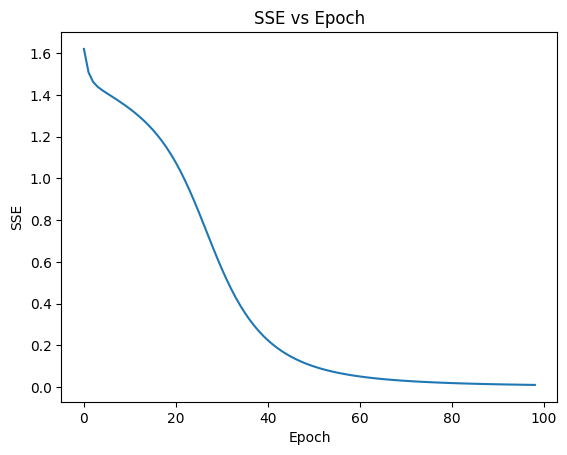

In [329]:
# Plot SSE vs Epoch
plt.plot(sseArr)
plt.title("SSE vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("SSE")
plt.show()

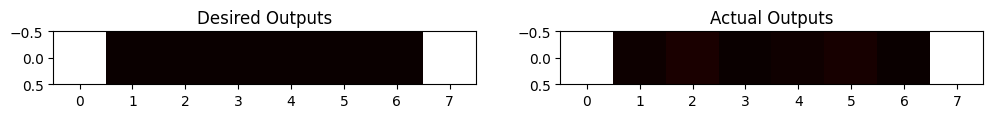

In [330]:
# Display desired vs actual outputs
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(desired_output.reshape(1, -1), cmap='hot', interpolation='nearest')
axs[0].set_title("Desired Outputs")
axs[1].imshow(output_activation.reshape(1, -1), cmap='hot', interpolation='nearest')
axs[1].set_title("Actual Outputs")
plt.show()

### Testing the Model

To test the generalization performance of the previously developed model, we introduce a fresh batch of patterns and process them through the model without altering the weights. The Sum of Squared Errors (SSE) for these new patterns demonstrates a notable increase, with values oscillating between 1 and 4. This indicates a limitation in the model's ability to generalize effectively. The model struggles to accurately assess the parity of its input units, shown by the visual comparison of desired and actual outputs, highlighting a discrepancy between what was expected and what the model predicted.

SSE of the newly-generated random patterns: 1.9633155148016108


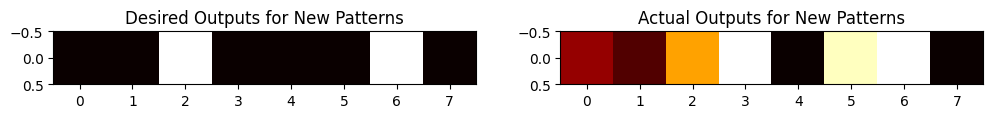

Desired Outputs for New Patterns: [0 0 1 0 0 0 1 0]
Actual Outputs for New Patterns: [0.20867691 0.11116772 0.58613201 0.96146642 0.00936992 0.89992444
 0.9594129  0.01037764]


In [331]:
# Generating new set of patterns for testing
new_patterns = np.round(np.random.rand(8, num_input_units))

# Calculating the desired output for new patterns
new_desired_output = np.array([1 if np.sum(pattern) % 2 == 0 else 0 for pattern in new_patterns])

# Forward pass through the model with new patterns
new_hidden_activation = activation_fn(np.dot(new_patterns, w_fg))
new_output_activation = activation_fn(np.dot(new_hidden_activation, w_gh))

# Compute output error for new patterns
new_output_error = new_desired_output.reshape(-1, 1) - new_output_activation
new_sse = np.sum(new_output_error**2)

print("SSE of the newly-generated random patterns:", new_sse)

# Display desired vs actual outputs for new patterns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(new_desired_output.reshape(1, -1), cmap='hot', interpolation='nearest')
axs[0].set_title("Desired Outputs for New Patterns")
axs[1].imshow(new_output_activation.reshape(1, -1), cmap='hot', interpolation='nearest')
axs[1].set_title("Actual Outputs for New Patterns")
plt.show()

print("Desired Outputs for New Patterns:", new_desired_output)
print("Actual Outputs for New Patterns:", new_output_activation.ravel())
